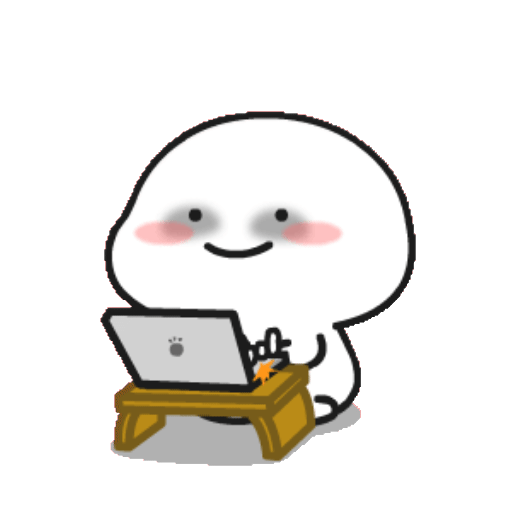

---
<h2 align="center">Library</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

---
<h2 align="center">Dataset Understanding</h2>

**People**
- Education: Customer's education level
- Age: Age of Customer’s 
- Income: Customer's yearly household income   
- Is_Parent: 1 if the Customer is a parent, otherwise 0. 
- Family_Size: Total People in house. (the customer itself are counted)  
- Kidhome: Number of children in customer's household  
- Teenhome: Number of teenagers in customer's household  
- Customer_For: Number of days since Customer’s first purchase   
- Children: Number of Child at Home (Calculated from Teenhome + Kidhome)

**Products**
- Spent: Total spent of customer in last 2 years (calculated from sum of bellow product)
- Wines: Amount spent on wine in last 2 years
- Fruits: Amount spent on fruits in last 2 years
- Meat: Amount spent on meat in last 2 years
- Fish: Amount spent on fish in last 2 years
- Sweets: Amount spent on sweets in last 2 years
- Gold: Amount spent on gold in last 2 years

**Promotion**
- NumDealsPurchases: Number of purchases made with a discount
- Total_Promos: Total Number of purchases with Campaign/Promo

**Place**
- Recency: Number of day since customer's last purchase
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

---
<h2 align="center">Load Data</h2>

In [2]:
df = pd.read_csv('Processed_Data.csv')
df.shape

(2213, 24)

In [3]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Total_Promos,Spent,Children,Is_Parent,Living_With,Family_Size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,4,7,971,57,0,1617,0,0,Alone,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,2,5,125,60,0,27,2,1,Alone,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,10,4,472,49,0,776,0,0,Partner,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,4,6,65,30,0,53,1,1,Partner,3
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,6,5,321,33,0,422,1,1,Partner,3


---
<h2 align="center">Column Labeling</h2>

In [4]:
df.Education.unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [5]:
education_order = {'Undergraduate': 1, 
                   'Graduate': 2, 
                   'Postgraduate': 3
                  }

df['Education'] = df['Education'].map(education_order)

In [6]:
df.Education.unique()

array([2, 3, 1], dtype=int64)

In [7]:
df.Living_With.unique()

array(['Alone', 'Partner'], dtype=object)

In [8]:
le = LabelEncoder()

In [9]:
df['Living_With'] = le.fit_transform(df['Living_With'])

In [10]:
print('Label Asli: ', le.classes_)
print('Label Encode / Transformasi: ', le.transform(le.classes_))

Label Asli:  ['Alone' 'Partner']
Label Encode / Transformasi:  [0 1]


> Format labeling kita sudah sesuai, 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2213 non-null   int64  
 1   Income               2213 non-null   float64
 2   Kidhome              2213 non-null   int64  
 3   Teenhome             2213 non-null   int64  
 4   Recency              2213 non-null   int64  
 5   Wines                2213 non-null   int64  
 6   Fruits               2213 non-null   int64  
 7   Meat                 2213 non-null   int64  
 8   Fish                 2213 non-null   int64  
 9   Sweets               2213 non-null   int64  
 10  Gold                 2213 non-null   int64  
 11  NumDealsPurchases    2213 non-null   int64  
 12  NumWebPurchases      2213 non-null   int64  
 13  NumCatalogPurchases  2213 non-null   int64  
 14  NumStorePurchases    2213 non-null   int64  
 15  NumWebVisitsMonth    2213 non-null   i

In [12]:
df_copy = df.copy()

---
<h2 align="center">Standarization</h2>

In [13]:
scaler = StandardScaler()

In [14]:
df_scaled = scaler.fit_transform(df_copy)
df_scaled = pd.DataFrame(df_scaled, columns=df_copy.columns)
df_scaled

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Total_Promos,Spent,Children,Is_Parent,Living_With,Family_Size
0,-0.411566,0.234435,-0.823208,-0.929307,0.310773,0.978107,1.552498,1.690807,2.454109,1.484200,...,-0.555456,0.692198,1.973525,1.018785,-0.439042,1.676723,-1.264914,-1.581639,-1.350076,-1.758879
1,-0.411566,-0.234084,1.039532,0.908545,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,-0.633818,...,-1.170837,-0.132699,-1.665655,1.275248,-0.439042,-0.962927,1.404857,0.632255,-1.350076,0.448948
2,-0.411566,0.769733,-0.823208,-0.929307,-0.795142,0.358351,0.570796,-0.178264,1.339972,-0.146917,...,1.290688,-0.545148,-0.172989,0.334882,-0.439042,0.280531,-1.264914,-1.581639,0.740699,-0.654965
3,-0.411566,-1.016592,1.039532,-0.929307,-0.795142,-0.872266,-0.561936,-0.655569,-0.504747,-0.585128,...,-0.555456,0.279749,-1.923752,-1.289387,-0.439042,-0.919763,0.069971,0.632255,0.740699,0.448948
4,1.124346,0.240593,1.039532,-0.929307,1.554927,-0.391881,0.419766,-0.218411,0.152777,-0.000847,...,0.059925,-0.132699,-0.822535,-1.032923,-0.439042,-0.307165,0.069971,0.632255,0.740699,0.448948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,-0.411566,0.356988,-0.823208,0.908545,-0.103945,1.197542,0.419766,0.067079,0.079719,2.214550,...,-0.555456,-0.132699,0.123824,0.163906,-0.439042,1.218520,0.069971,0.632255,0.740699,0.448948
2209,1.124346,0.467861,2.902273,0.908545,0.241653,0.299044,-0.662623,-0.610961,-0.687392,-0.658163,...,-0.247765,0.692198,-1.940959,1.959151,1.033078,-0.270642,2.739742,0.632255,0.740699,2.656775
2210,-0.411566,0.188473,-0.823208,-0.929307,1.451248,1.787645,0.545625,0.223207,-0.102927,-0.366022,...,2.213760,0.279749,-0.848345,-1.032923,1.033078,1.052504,-1.264914,-1.581639,-1.350076,-1.758879
2211,1.124346,0.675663,-0.823208,0.908545,-1.417219,0.364281,0.092532,0.209824,0.773771,0.072188,...,1.290688,-0.957597,-0.844043,1.104272,-0.439042,0.391761,0.069971,0.632255,0.740699,0.448948


---
<h2 align="center">PCA n-Component</h2>

In [15]:
pca = PCA(n_components=None)
pca.fit(df_scaled)

PCA()

---
<h2 align="center">Cumulative Explained Variance Ratio</h2>

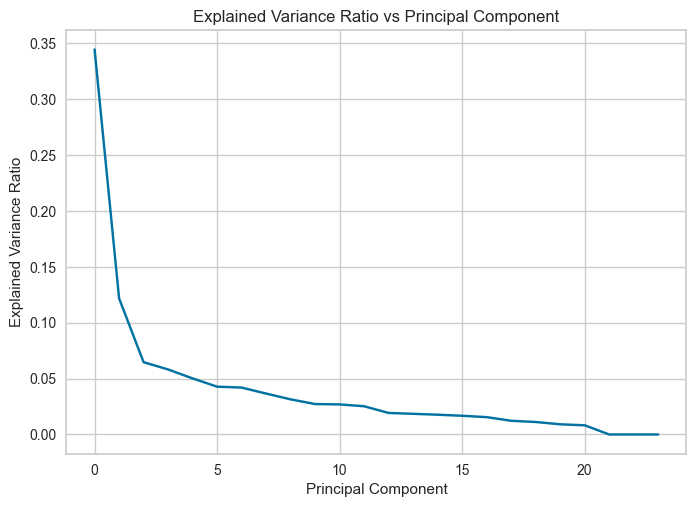

In [16]:
exp_var_ratio = pca.explained_variance_ratio_
plt.plot(exp_var_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Principal Component');

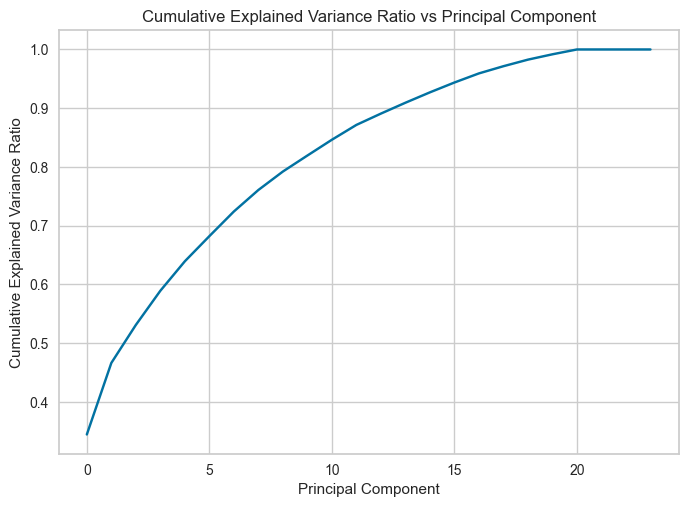

In [17]:
cum_exp_var_ratio = np.cumsum(exp_var_ratio)
plt.plot(cum_exp_var_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Principal Component');

---
<h2 align="center">Best Principal Component (n)</h2>

In [18]:
threshold = 0.8
n_components = np.argmax(cum_exp_var_ratio >= threshold) + 1

In [19]:
print(f'Best PC: {n_components}')

Best PC: 10


Berdasarkan hasil plot Explained Variance, jumlah PC terbaik yang dapat dipilih adalah **10**

---
<h2 align="center">PCA with 10</h2>

In [20]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_scaled)

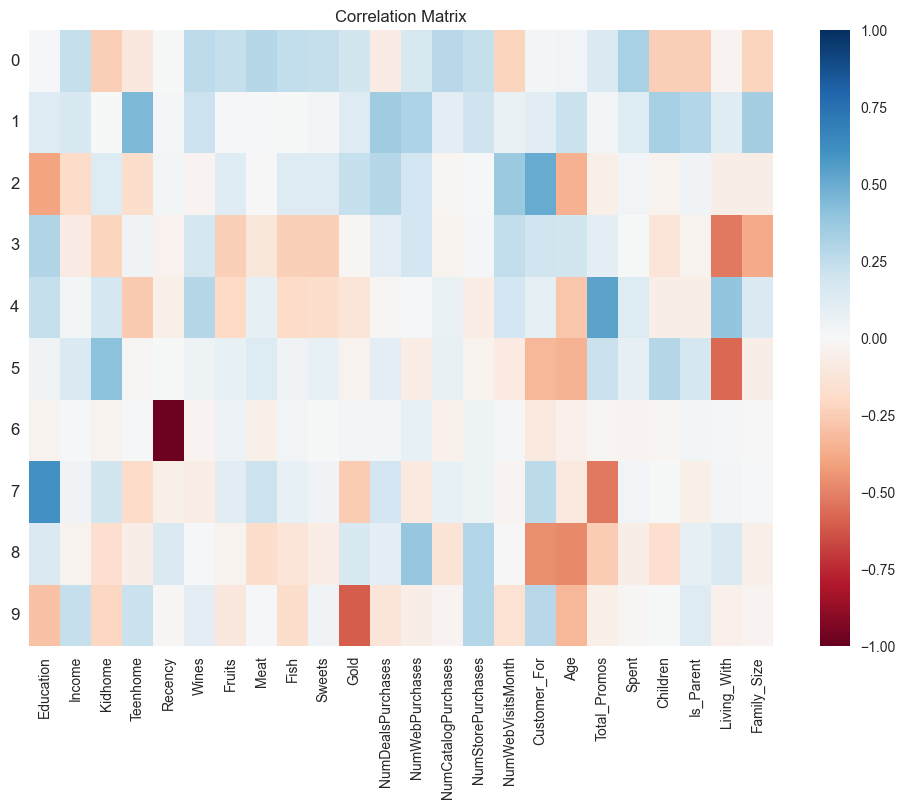

In [21]:
df_pca_components = pd.DataFrame(
    data=pca.components_.round(4),
    columns=df.columns.values)

plt.figure(figsize=(12, 8))
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=False,
    annot_kws={"size": 12},
    fmt='.2f'
)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
plt.title('Correlation Matrix');

- Component 4 = Mewakili Total Promos
- Component 7 = Mewakili Education
- Component 2 = Mewakili Customer for

---
<h2 align="center">Finding k</h2>

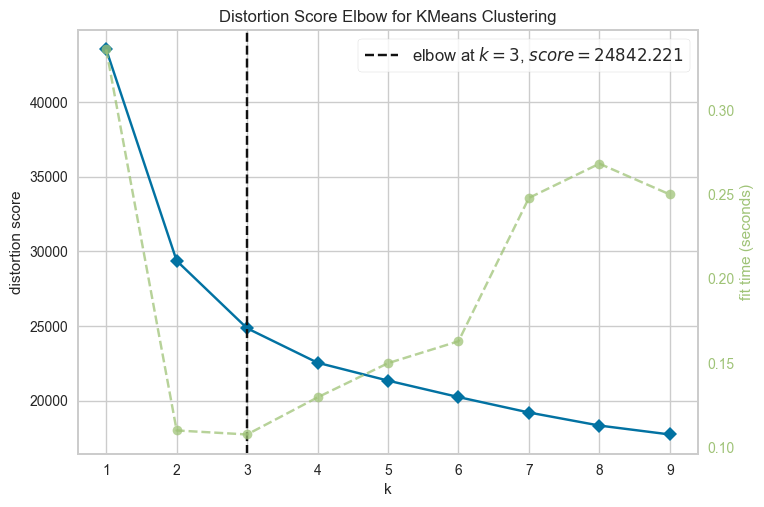

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
km = KMeans(random_state = 42)
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(df_pca)
visualizer.show()

---
<h2 align="center">Elbow Method</h2>

In [23]:
inertia_values = []
silhouette_scores = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia_values.append(kmeans.inertia_)
    labels = kmeans.labels_
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)

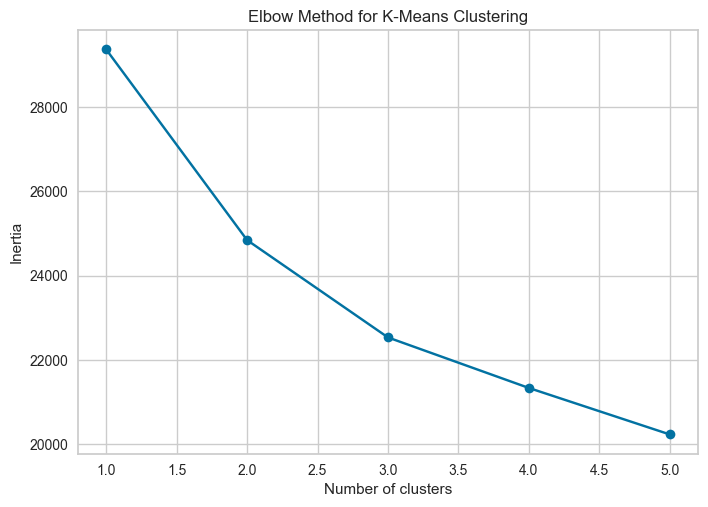

In [24]:
plt.plot(range(1, 6), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means Clustering');

---
<h2 align="center">Silhouette Score and Visualizer</h2>

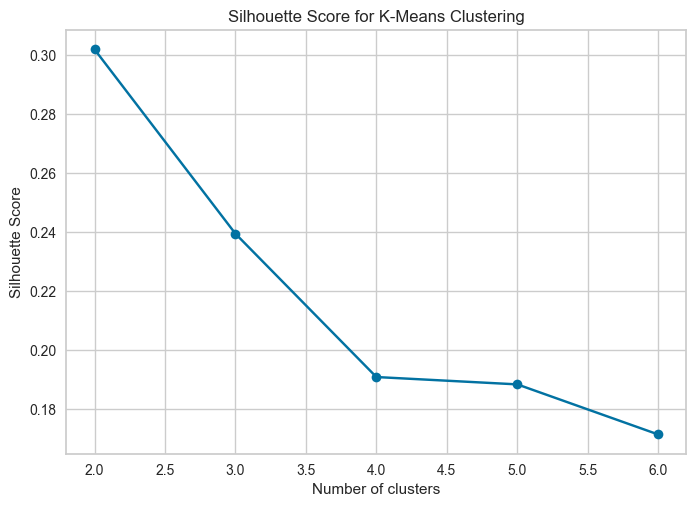

In [25]:
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering');

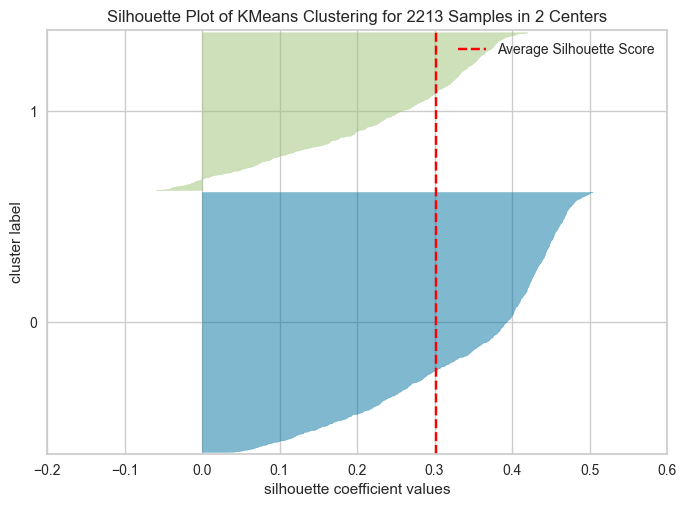

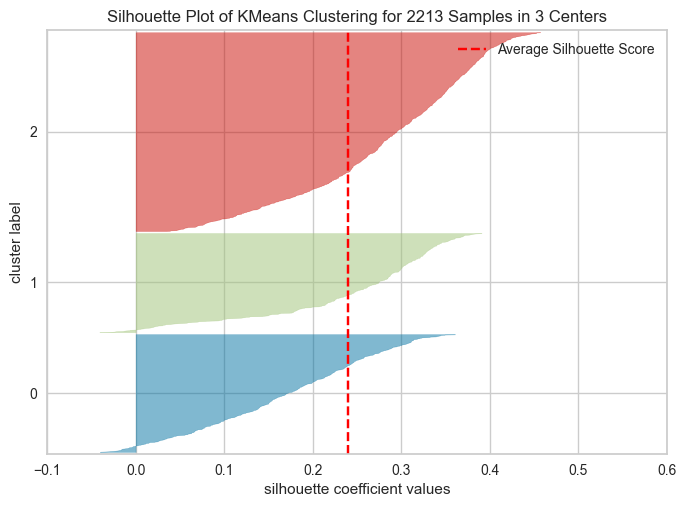

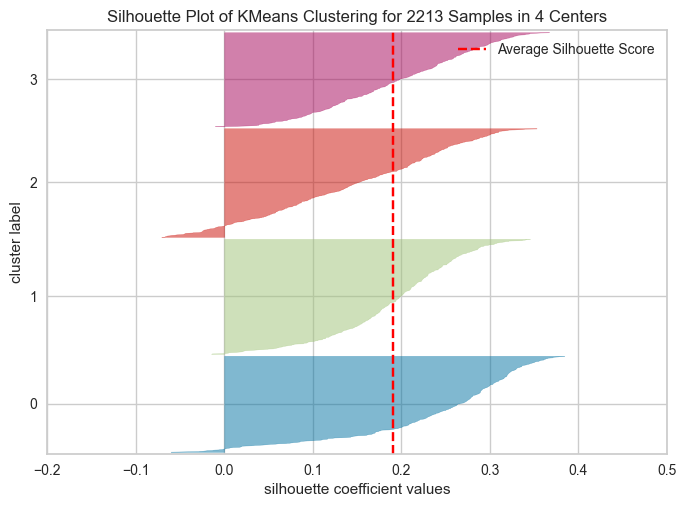

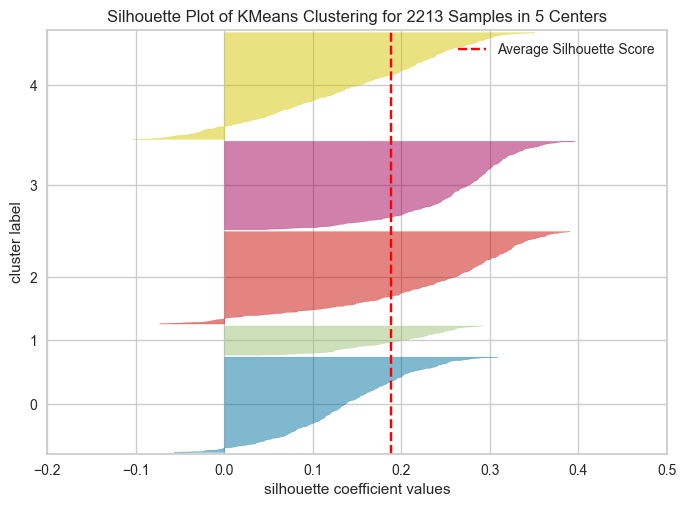

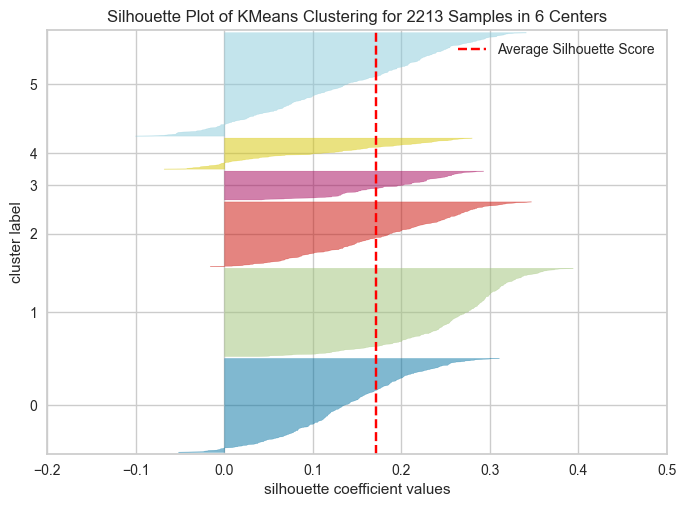

In [26]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(df_pca)
    visualizer.show()

Setelah saya pertimabangkan akan menggunakan cluster = 2. Average silhouette score tinggi, minus tidak terlalu fatal, dan pembagian cluster seimbang tidak terlalu imbalance

---
<h2 align="center">K-Means Clustering with n = 2</h2>

In [27]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=2, random_state=42)

In [28]:
pca_cluster_labels = kmeans.predict(df_pca)

In [29]:
df_clustered = df.copy()
df_clustered['Cluster'] = pca_cluster_labels

---
<h2 align="center">PC1 vs PC2 by Cluster</h2>

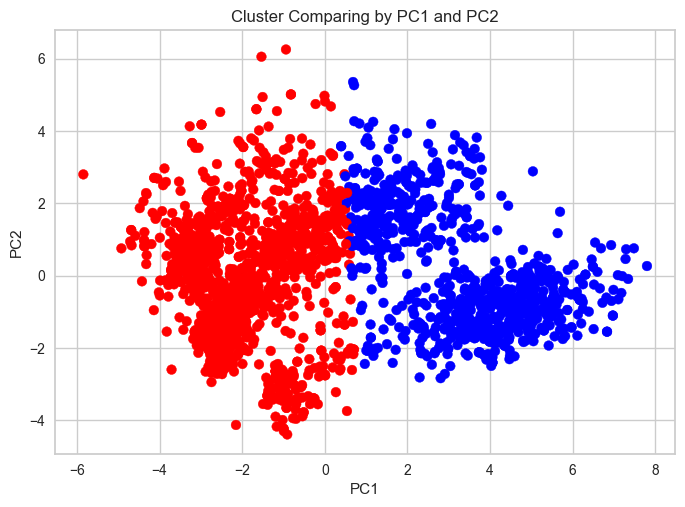

In [30]:
colors = ['red', 'blue']
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=[colors[label] for label in pca_cluster_labels])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Comparing by PC1 and PC2');

---
<h2 align="center">Cluster BoxPlot vs Features</h2>

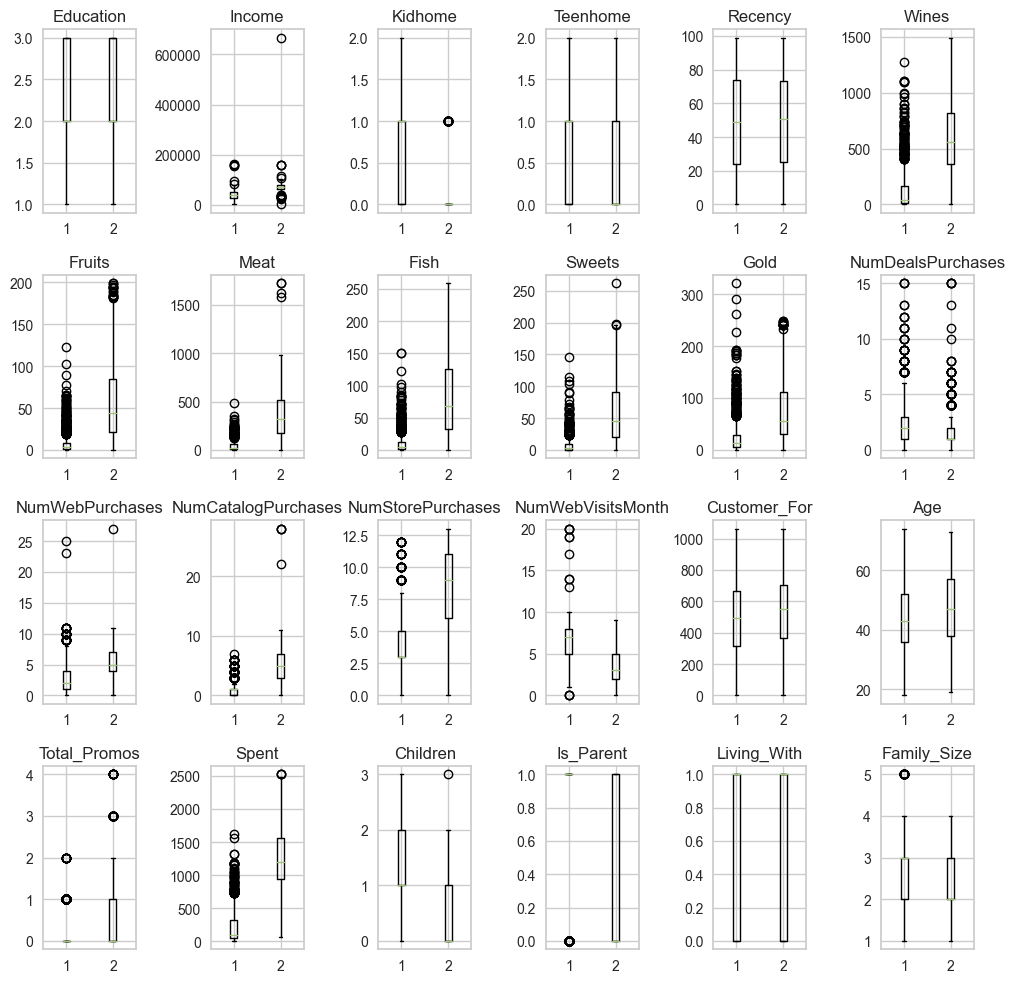

In [31]:
cluster0 = df_clustered[df_clustered['Cluster'] == 0]
cluster1 = df_clustered[df_clustered['Cluster'] == 1]
fig, axs = plt.subplots(4, 6, figsize=(10, 10))
features = df.columns
for i, feature_group in enumerate(np.array_split(features, 4)):
    for j, feature in enumerate(feature_group):
        axs[i, j].boxplot([cluster0[feature], cluster1[feature]])
        axs[i, j].set_title(feature)
plt.tight_layout();

---
<h2 align="center">Profiling</h2>

In [32]:
def highlight_max_min(s):
    is_max = s == s.max()
    is_min = s == s.min()
    return ['background-color: #FFE15D' if v else 'background-color: #E96479' if is_min[i] else '' for i,v in enumerate(is_max)]

In [33]:
profile = df_clustered.groupby('Cluster').mean().round(2).T
profile_styled = profile.style.apply(highlight_max_min, axis=1)

In [34]:
print('Info Label')
print('====='*15)
print('Label Education:', education_order)
print('Label Living_With Asli: ', le.classes_)
print('Label Living_With Encode: ', le.transform(le.classes_))
print('====='*15)
print('Cluster Profiling by Average Values')
print('====='*15)
profile_styled

Info Label
Label Education: {'Undergraduate': 1, 'Graduate': 2, 'Postgraduate': 3}
Label Living_With Asli:  ['Alone' 'Partner']
Label Living_With Encode:  [0 1]
Cluster Profiling by Average Values


Cluster,0,1
Education,2.250000,2.300000
Income,39873.910000,72599.490000
Kidhome,0.680000,0.050000
Teenhome,0.590000,0.370000
Recency,48.780000,49.390000
Wines,123.070000,605.070000
Fruits,7.190000,57.850000
Meat,41.160000,374.180000
Fish,9.880000,83.360000
Sweets,7.170000,59.760000


---
<h2 align="center">Result & Conclusion</h2>

### <mark style="font-weight: bold; background-color: #F47C7C">Cluster 0: Low-Spending Customers</mark>

    Cluster ini terdiri dari orang yang mayoritas berpendidikan lulusan sarjana (graduate) dan postgraduate, memiliki tingkat penghasilan yang rendah, banyak memiliki anak di rumah, dan telah menjadi pelanggan selama kurang lebih 1,5 tahun. Mereka cenderung membeli produk dengan jumlah yang sedikit dan tidak sering mengunjungi situs web perusahaan.

`Metrics`
- Rata-rata pendapatan tahunan: **39.873,91 USD**
- Rata-rata jumlah anak di rumah: **1,27**
- Rata-rata lama menjadi pelanggan: **497,45 hari**
- Persentase pelanggan yang menjadi orang tua: **91%**
- Produk yang paling banyak dibeli: **Daging**
- Jumlah pembelian dengan diskon yang dilakukan: **2,6**
- Total jumlah pembelian dengan promo: **0,12**
- Persentase pelanggan yang tinggal sendiri: **66%**

### <mark style="font-weight: bold; background-color: #A1DE93">Cluster 1: High-Spending Customers</mark>

    Cluster ini terdiri dari orang yang mayoritas berpendidikan postgraduate, memiliki tingkat penghasilan yang tinggi, sedikit memiliki anak di rumah, dan telah menjadi pelanggan selama kurang lebih 1,5 tahun. Mereka cenderung membeli produk dalam jumlah yang lebih banyak dan sering mengunjungi situs web perusahaan.
    
`Metrics`
- Rata-rata pendapatan tahunan: **72.599,49 USD**
- Rata-rata jumlah anak di rumah: **0,42**
- Rata-rata lama menjadi pelanggan: **536,53 hari**
- Persentase pelanggan yang menjadi orang tua: **40%**
- Produk yang paling banyak dibeli: **Emas**
- Jumlah pembelian dengan diskon yang dilakukan: **1,88**
- Total jumlah pembelian dengan promo: **0,59**
- Persentase pelanggan yang tinggal bersama pasangan: **62%**

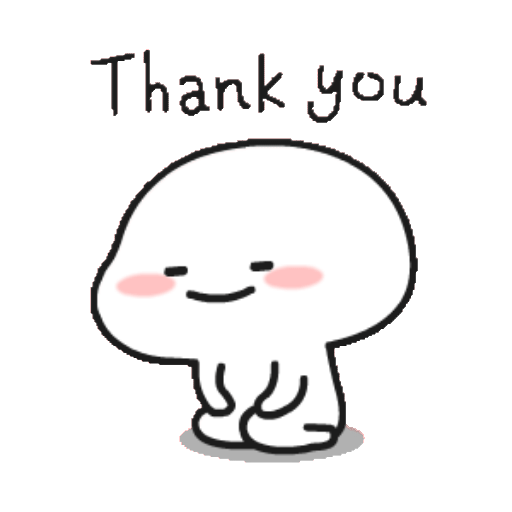